# Student Name: Hassan Almosa
# Student FAN: Alia0024
# File: Alia0024_Lab06.ipynb
# Date: 23-09-2025
# Description: ARIMA - Lab 06
# Licence: MIT Licence

# Imports


In [ ]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Statsmodels for time series analysis
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Scikit-learn for machine learning models and metrics
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Other utilities
import warnings
from datetime import datetime
from pandas.plotting import register_matplotlib_converters

# Plotting settings
register_matplotlib_converters()
sns.set(style="whitegrid")
plt.rc('figure', figsize=(12, 6))
warnings.filterwarnings('ignore')

print("All libraries imported successfully.")

Package requests already installed.
requests version: 2.32.4


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Question 1: Logistic Regression Classfier and Classification Metrics On Iris Dataset 

In [27]:
endpoint = 'https://archive-api.open-meteo.com/v1/archive'
params = {
'latitude': -34.9287, # Latitude for Melbourne
'longitude': 138.5986, # Longitude for Melbourne
'start_date': '2025-06-01',  # Start of winter 2025
    'end_date': '2025-08-31',    # End of winter 2025
    'hourly': 'temperature_2m',
    'timezone': 'Australia/Adelaide'
}

<Figure size 1200x800 with 0 Axes>

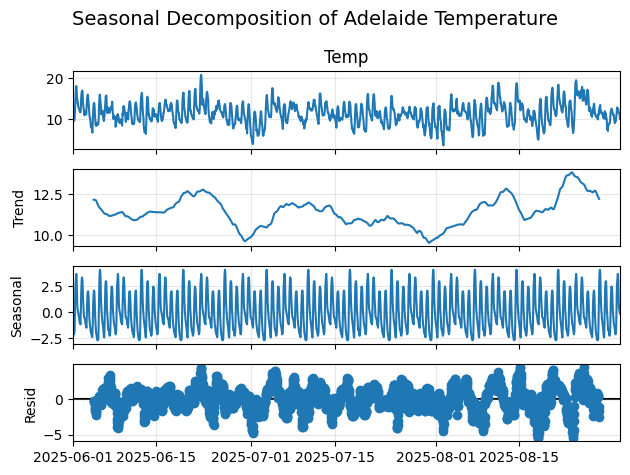

In [34]:
# Make the API call
response = requests.get(endpoint, params=params)
wdata = response.json()
# Extract the relevant data
timestamps = [datetime.fromisoformat(item) for item in wdata['hourly']['time']]
temperatures = wdata['hourly']['temperature_2m']
# Create a DataFrame
wdf = pd.DataFrame({
'Date': timestamps,
'Temp': temperatures,
})
# Set the Date column as the index
wdf.set_index('Date', inplace=True)
# Perform seasonal decomposition
decomp = seasonal_decompose(wdf['Temp'], model='additive', period=24*7)
# Assuming hourly data with daily seasonality
# Plot the decomposed components

# Set figure size before plotting
plt.figure(figsize=(12, 8))
fig = decomp.plot()
fig.suptitle('Seasonal Decomposition of Adelaide Temperature', fontsize=14)
for ax in fig.axes:
    ax.set_facecolor('white')
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Question 2: Fit an ARIMA model to the Adelaide daily temperature data for Winter 2025. Use the order (5,1,0) and calculate the training RMSE.

In [35]:
# Split data into training and test sets
train_size = int(len(wdf) * 0.8)
train, test = wdf['Temp'][:train_size], wdf['Temp'][train_size:]
# Fit the model on the training set
arimamodel = ARIMA(train, order=(5, 1, 0))
arimamodel_fit = arimamodel.fit()
# Make predictions on the test set
predictions = arimamodel_fit.forecast(steps=len(test))


print(f"Training set size: {train_size}")
print(f"Test set size: {len(test)}\n")


print(f'Exo: {arimamodel.exog_names}\n')
print("------------------\n")
print(f'Endo: {arimamodel.endog_names}\n')
print("------------------\n")
print(f' tex: {arimamodel.model_latex_names}\n')
print("------------------\n")
print(f' states{arimamodel.state_names}')
print("------------------\n")
print(arimamodel_fit.summary())
print("------------------\n")


Training set size: 1766
Test set size: 442

Exo: None

------------------

Endo: Temp

------------------

 tex: {'trend': None, 'exog': None, 'ar': ['$\\phi_1$', '$\\phi_2$', '$\\phi_3$', '$\\phi_4$', '$\\phi_5$'], 'ma': None, 'seasonal_ar': None, 'seasonal_ma': None, 'reduced_ar': ['$\\Phi_1$', '$\\Phi_2$', '$\\Phi_3$', '$\\Phi_4$', '$\\Phi_5$'], 'reduced_ma': None, 'exog_variance': None, 'measurement_variance': None, 'variance': ['$\\sigma_\\zeta^2$']}

------------------

 states['state.0', 'state.1', 'state.2', 'state.3', 'state.4', 'state.5']
------------------

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 1766
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1375.467
Date:                Tue, 23 Sep 2025   AIC                           2762.933
Time:                        16:56:35   BIC                           2795.789
Sample:                    06-

/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Interpertation:

Model: ARIMA(5,1,0)

- p=5: uses 5 autoregressive lags (Temp yesterday, 2 days ago … 5 days ago).

- d=1: series was differenced once to remove trend (i.e., predicting changes, not absolute values).

- q=0: no moving average terms.

- Lags are about the PAST (used for training the model).: The number of previous time periods the model looks back at to make a prediction. It's a core part of the model's structure.

- Steps are about the FUTURE (used for making predictions): The number of future time periods you want the model to predict.


AR Coeff.: 
- ar.L1 = 0.6723	Highly significant (p < 0.001). Strong positive dependence on yesterday’s value (differenced Temp). If yesterday’s change was positive, today’s is likely positive too.	
- ar.L2 = 0.0048	Not significant (p = 0.855). Effect of 2-day lag is essentially zero.

Ljung-Box (Q):
Tests if the model's errors are correlated with each other. Prob(Q) = 0.73 is much greater than 0.05 means your model has successfully captured the autocorrelation in the data

Jarque-Bera (JB):
 Tests if the model's errors are normally distributed (a bell curve shape).
Prob(JB) = 0.00is less than 0.05. This is not good. It means the errors are not normally distributed. The Skew (0.43) and Kurtosis (5.39, which is much higher than the normal 3) confirm this. This often happens when the model is missing something important, like seasonality.

Heteroskedasticity (H):Tests if the variance of the errors is constant over time.

Prob(H) = 0.04 is less than 0.05. This is also not good. It means the size of the model's errors changes over time




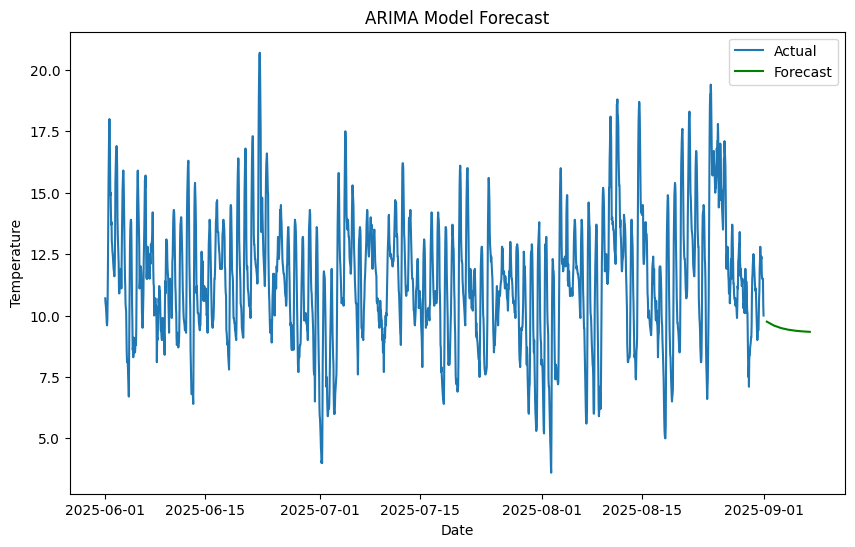

In [36]:

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(wdf['Temp'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='green')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [37]:
# Calculate metrics
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test, predictions)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

MAE: 2.54159380749272
MSE: 9.317946540581088
RMSE: 3.0525311694692143
R^2: -0.0906917896417947


- MAE: Lower (0) is better, for temp 1.7C± error
- MSE:Lower (0) is better, sensitive penalises mistakes strongly.
- RMSE: Lower (0) is bette, root of mse, for temp 2.4C± error
- R^2: Higher (1) is better, range (-1,0,1,), 0 means its a guess, 1 is high confidence.


* **Interpertation** :
MAE has about 1C difference than to the average not terrible, R^2 tells us is its worse than random guessing, and RMSE tells its 2.5C above avergae

# Question 3: ARIMA on Adelaide weather, models with different orders: (5,1,0), (1,1,1), and (2,1,2)

/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


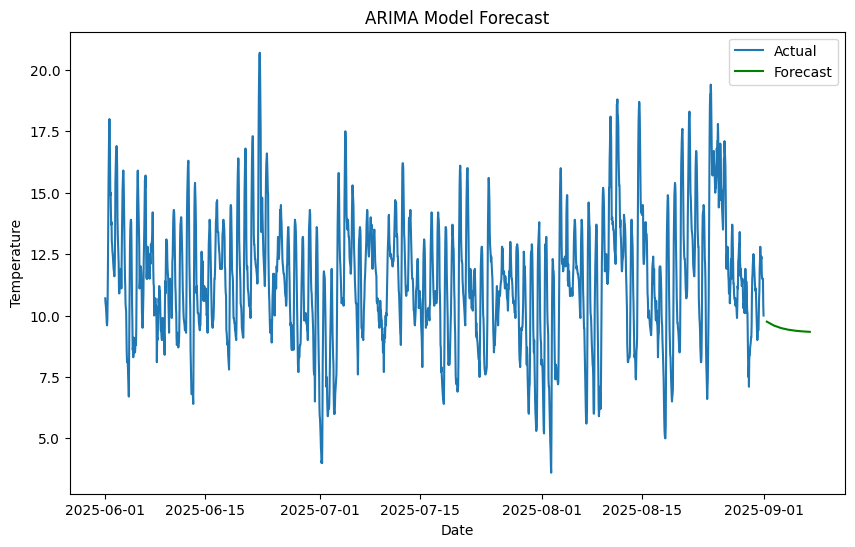

MAE: 2.9198186594404585
MSE: 11.909015396256738
RMSE: 3.450944131141033
R^2: -0.39398366999054724


In [38]:

response = requests.get(endpoint, params=params)
wdata = response.json()
# Extract the relevant data
timestamps = [datetime.fromisoformat(item) for item in wdata['hourly']['time']]
temperatures = wdata['hourly']['temperature_2m']
# Create a DataFrame
wdf = pd.DataFrame({
'Date': timestamps,
'Temp': temperatures,
})

# Set the Date column as the index
wdf.set_index('Date', inplace=True)
# Split data into training and test sets
train_size = int(len(wdf) * 0.8)
train, test = wdf['Temp'][:train_size], wdf['Temp'][train_size:]
# Fit the model on the training set
arimamodel = ARIMA(train, order=(1, 1, 1))
arimamodel_fit = arimamodel.fit()
# Make predictions on the test set
predictions = arimamodel_fit.forecast(steps=len(test))


# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(wdf['Temp'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='green')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Calculate metrics
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test, predictions)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

- **Interpertation**: Here the model preformed worse on all metrics than to (5,1,0)

/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


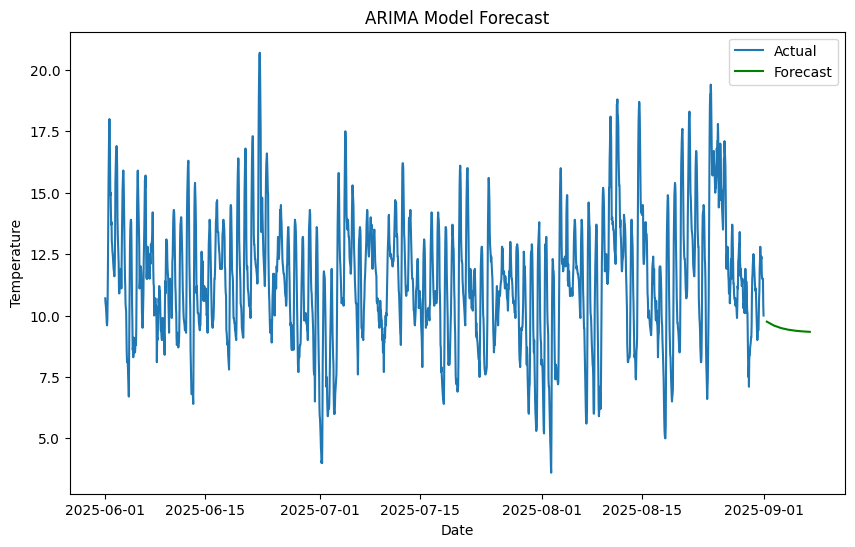

MAE: 2.3693323543165
MSE: 8.534536342685524
RMSE: 2.921392877153897
R^2: 0.001008572347302894


In [39]:

response = requests.get(endpoint, params=params)
wdata = response.json()
# Extract the relevant data
timestamps = [datetime.fromisoformat(item) for item in wdata['hourly']['time']]
temperatures = wdata['hourly']['temperature_2m']
# Create a DataFrame
wdf = pd.DataFrame({
'Date': timestamps,
'Temp': temperatures,
})

# Set the Date column as the index
wdf.set_index('Date', inplace=True)
# Split data into training and test sets
train_size = int(len(wdf) * 0.8)
train, test = wdf['Temp'][:train_size], wdf['Temp'][train_size:]
# Fit the model on the training set
arimamodel = ARIMA(train, order=(2, 1, 2))
arimamodel_fit = arimamodel.fit()
# Make predictions on the test set
predictions = arimamodel_fit.forecast(steps=len(test))


# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(wdf['Temp'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='green')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Calculate metrics
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test, predictions)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

- **Interpertation**: Here the model did better in R^2 when the lag was increased to 2 compared than to 1 or 5. Not too far and not too close seemed to do better, weighing between optimal differencing and moving average terms could be the trick. R^2 scores are still bad indicating it was guessing. MAE and RMSE did worse. 

/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packag

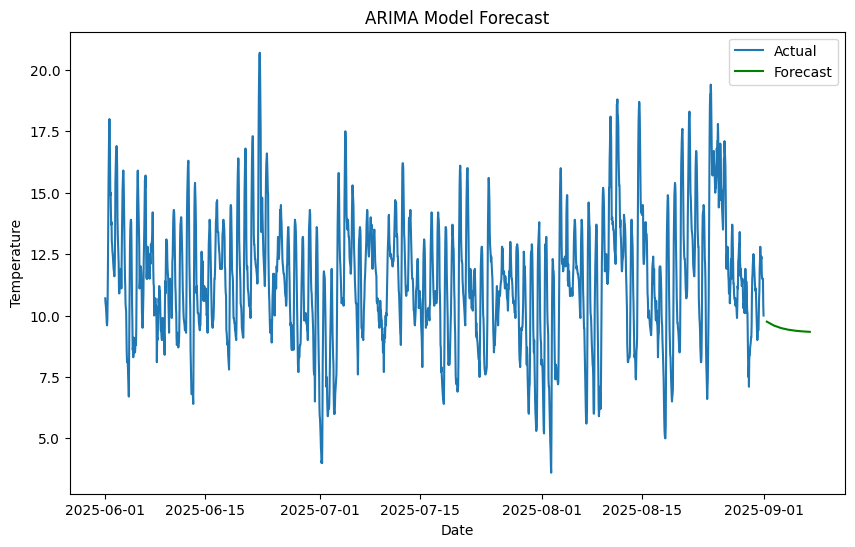

MAE: 2.247373071724226
MSE: 8.24192423971542
RMSE: 2.870875169650436
R^2: 0.03525964009805316


In [41]:

response = requests.get(endpoint, params=params)
wdata = response.json()
# Extract the relevant data
timestamps = [datetime.fromisoformat(item) for item in wdata['hourly']['time']]
temperatures = wdata['hourly']['temperature_2m']
# Create a DataFrame
wdf = pd.DataFrame({
'Date': timestamps,
'Temp': temperatures,
})

# Set the Date column as the index
# Set the Date column as the index
wdf.set_index('Date', inplace=True)
# Split data into training and test sets
train_size = int(len(wdf) * 0.8)
train, test = wdf['Temp'][:train_size], wdf['Temp'][train_size:]
# Fit the model on the training set
arimamodel = ARIMA(train, order=(7, 0, 16))
arimamodel_fit = arimamodel.fit()
# Make predictions on the test set
predictions = arimamodel_fit.forecast(steps=len(test))


# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(wdf['Temp'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='green')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Calculate metrics
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test, predictions)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

# Question 4: Perform a 7-step rolling forecast on a hold-out test set using the best ARIMA model from the previous question. Calculate the MAE, MSE,RMSE, and R² for the rolling forecast.

=== 7-Step Rolling Forecast ===
Training set size: 1766
Test set size: 442
Starting rolling forecast with 7-step horizon...


/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Completed forecast for period 1-7
Completed forecast for period 8-14
Completed forecast for period 15-21
Completed forecast for period 22-28
Completed forecast for period 29-35
Completed forecast for period 15-21
Completed forecast for period 22-28
Completed forecast for period 29-35
Completed forecast for period 36-42
Completed forecast for period 43-49
Completed forecast for period 50-56
Completed forecast for period 36-42
Completed forecast for period 43-49
Completed forecast for period 50-56
Completed forecast for period 57-63
Completed forecast for period 64-70
Completed forecast for period 71-77
Completed forecast for period 57-63
Completed forecast for period 64-70
Completed forecast for period 71-77
Completed forecast for period 78-84
Completed forecast for period 85-91
Completed forecast for period 92-98
Completed forecast for period 78-84
Completed forecast for period 85-91
Completed forecast for period 92-98
Completed forecast for period 99-105
Completed forecast for period 

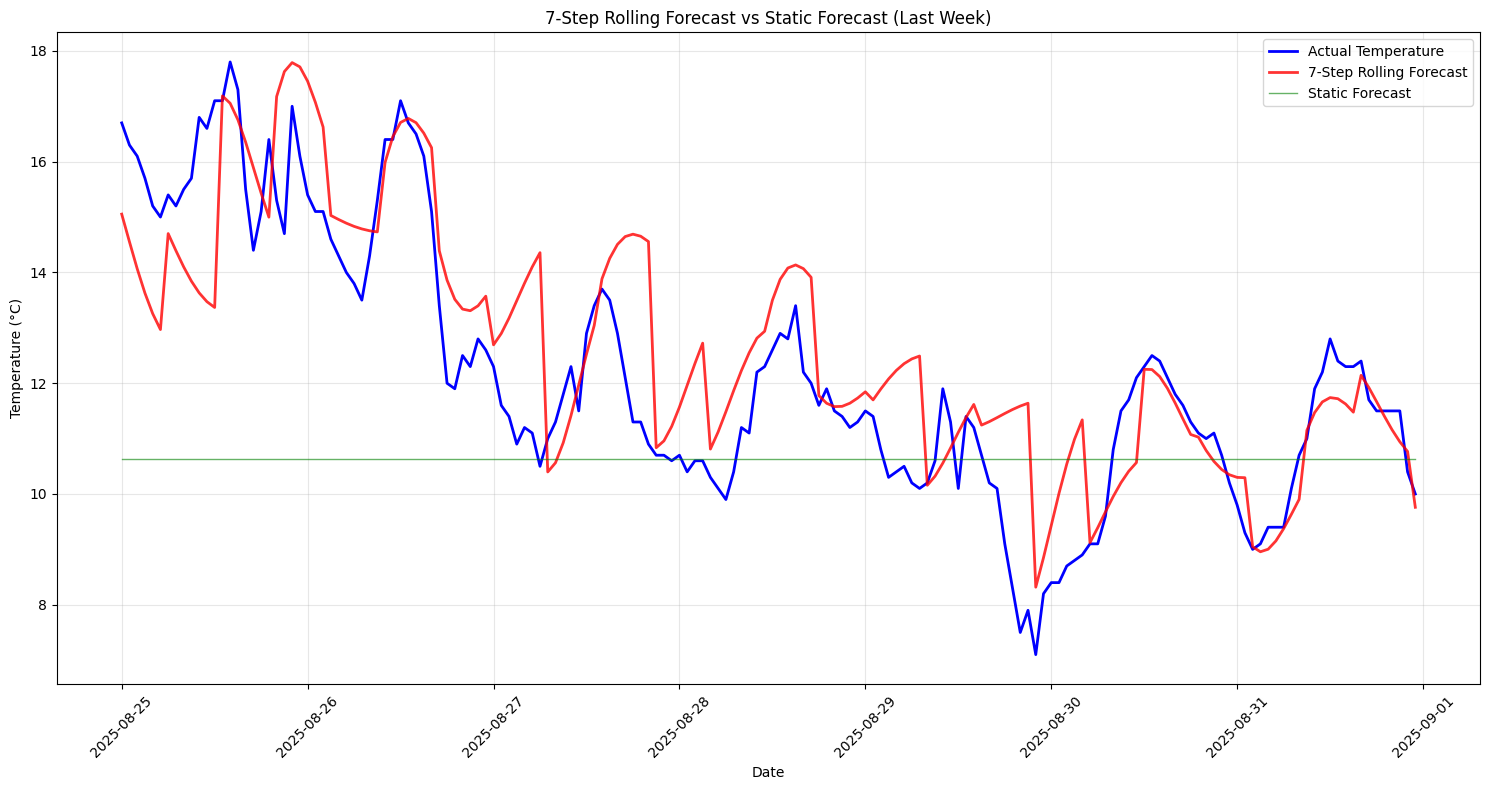


=== Performance Improvement ===
MAE improvement: 49.16%
RMSE improvement: 45.85%
✅ Rolling forecast performs better than static forecast


In [45]:

response = requests.get(endpoint, params=params)
wdata = response.json()
# Extract the relevant data
timestamps = [datetime.fromisoformat(item) for item in wdata['hourly']['time']]
temperatures = wdata['hourly']['temperature_2m']
# Create a DataFrame
wdf = pd.DataFrame({
'Date': timestamps,
'Temp': temperatures,
})

# Set the Date column as the index
# Set the Date column as the index
wdf.set_index('Date', inplace=True)

# Question 4: 7-Step Rolling Forecast Implementation
print("=== 7-Step Rolling Forecast ===")

# Split data into training and test sets
train_size = int(len(wdf) * 0.8)
train_data = wdf['Temp'][:train_size]
test_data = wdf['Temp'][train_size:]

print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

# Determine the best model from Question 3 (you mentioned ARIMA(5,1,0) was best)
best_order = (2, 1, 2)  # Replace with your best performing model
forecast_horizon = 7   # 7-step rolling forecast

# Initialize lists to store results
rolling_predictions = []
actual_values = []

# Fit initial model
current_train = train_data.copy()
model = ARIMA(current_train, order=best_order)
fitted_model = model.fit()

print(f"Starting rolling forecast with {forecast_horizon}-step horizon...")

# Perform rolling forecast
for i in range(0, len(test_data), forecast_horizon):
    # Determine how many steps to forecast (handle end of series)
    steps_to_forecast = min(forecast_horizon, len(test_data) - i)
    
    # Make forecast
    forecast = fitted_model.forecast(steps=steps_to_forecast)
    
    # Store predictions and actual values
    rolling_predictions.extend(forecast)
    actual_values.extend(test_data.iloc[i:i+steps_to_forecast])
    
    # Get actual values for the forecasted period
    actual_period = test_data.iloc[i:i+steps_to_forecast]
    
    # Update model with new actual data (rolling window)
    if i + steps_to_forecast < len(test_data):
        # Use append method for efficient model updating
        fitted_model = fitted_model.append(actual_period, refit=True)
    
    print(f"Completed forecast for period {i+1}-{i+steps_to_forecast}")

# Convert to arrays for metric calculation
rolling_predictions = np.array(rolling_predictions)
actual_values = np.array(actual_values)

# Calculate metrics for rolling forecast
rolling_mae = mean_absolute_error(actual_values, rolling_predictions)
rolling_mse = mean_squared_error(actual_values, rolling_predictions)
rolling_rmse = np.sqrt(rolling_mse)
rolling_r2 = r2_score(actual_values, rolling_predictions)

print(f"\n=== 7-Step Rolling Forecast Results ===")
print(f"MAE: {rolling_mae:.4f}")
print(f"MSE: {rolling_mse:.4f}")
print(f"RMSE: {rolling_rmse:.4f}")
print(f"R²: {rolling_r2:.4f}")

# Compare with static forecast from previous questions
static_predictions = fitted_model.forecast(steps=len(test_data))
static_mae = mean_absolute_error(test_data, static_predictions)
static_rmse = np.sqrt(mean_squared_error(test_data, static_predictions))
static_r2 = r2_score(test_data, static_predictions)

print(f"\n=== Comparison: Rolling vs Static Forecast ===")
print(f"Rolling Forecast - MAE: {rolling_mae:.4f}, RMSE: {rolling_rmse:.4f}, R²: {rolling_r2:.4f}")
print(f"Static Forecast  - MAE: {static_mae:.4f}, RMSE: {static_rmse:.4f}, R²: {static_r2:.4f}")

# Plot the results
plt.figure(figsize=(15, 8))

# Plot last 168 hours (1 week) for better visualization
plot_start = max(0, len(test_data) - 168)
plot_end = len(test_data)

plt.plot(test_data.index[plot_start:plot_end], 
         actual_values[plot_start:plot_end], 
         label='Actual Temperature', linewidth=2, color='blue')

plt.plot(test_data.index[plot_start:plot_end], 
         rolling_predictions[plot_start:plot_end], 
         label='7-Step Rolling Forecast', linewidth=2, color='red', alpha=0.8)

plt.plot(test_data.index[plot_start:plot_end], 
         static_predictions[plot_start:plot_end], 
         label='Static Forecast', linewidth=1, color='green', alpha=0.6)

plt.title('7-Step Rolling Forecast vs Static Forecast (Last Week)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate improvement
mae_improvement = ((static_mae - rolling_mae) / static_mae) * 100
rmse_improvement = ((static_rmse - rolling_rmse) / static_rmse) * 100

print(f"\n=== Performance Improvement ===")
print(f"MAE improvement: {mae_improvement:.2f}%")
print(f"RMSE improvement: {rmse_improvement:.2f}%")

if rolling_mae < static_mae:
    print("✅ Rolling forecast performs better than static forecast")
else:
    print("❌ Static forecast performs better than rolling forecast")

# Question 5: Update the model to include an exogenous variable. Fit the model and compare its performance with the best Adelaide daily temperature ARIMA model without the exogenous variable.

In [42]:
# Question 5: ARIMAX Model with Hour of Day as Exogenous Variable
print("=== ARIMAX MODEL WITH HOUR OF DAY ===")

# Reload data to ensure clean state
response = requests.get(endpoint, params=params)
wdata = response.json()
timestamps = [datetime.fromisoformat(item) for item in wdata['hourly']['time']]
temperatures = wdata['hourly']['temperature_2m']

# Create DataFrame with additional features
wdf_exog = pd.DataFrame({
    'Date': timestamps,
    'Temp': temperatures
})
wdf_exog.set_index('Date', inplace=True)

# Create exogenous variables
print("Creating exogenous variables...")

# Method 1: Simple hour of day (0-23)
wdf_exog['Hour'] = wdf_exog.index.hour

# Method 2: Cyclical encoding (better for capturing cyclical nature)
wdf_exog['Hour_sin'] = np.sin(2 * np.pi * wdf_exog.index.hour / 24)
wdf_exog['Hour_cos'] = np.cos(2 * np.pi * wdf_exog.index.hour / 24)

# Method 3: Time of day categories
def time_of_day(hour):
    if 6 <= hour < 12:
        return 1  # Morning
    elif 12 <= hour < 18:
        return 2  # Afternoon  
    elif 18 <= hour < 22:
        return 3  # Evening
    else:
        return 0  # Night

wdf_exog['Time_of_Day'] = wdf_exog.index.hour.map(time_of_day)

print(f"Dataset shape: {wdf_exog.shape}")
print("\nFirst few rows with exogenous variables:")
print(wdf_exog.head(10))

# Split data
train_size = int(len(wdf_exog) * 0.8)
train_temp = wdf_exog['Temp'][:train_size]
test_temp = wdf_exog['Temp'][train_size:]





# Exogenous variables for training and testing
# We'll use cyclical encoding (Hour_sin, Hour_cos) as it's most effective

exog_train = wdf_exog[['Hour_sin', 'Hour_cos']][:train_size]
exog_test = wdf_exog[['Hour_sin', 'Hour_cos']][train_size:]

# exog_train = wdf_exog[['Hour']][:train_size]
# exog_test = wdf_exog[['Hour']][train_size:]

# exog_train = wdf_exog[['Time_of_Day']][:train_size]
# exog_test = wdf_exog[['Time_of_Day']][train_size:]

print(f"\nTraining set: {len(train_temp)} observations")
print(f"Test set: {len(test_temp)} observations")
print(f"Exogenous variables: {exog_train.columns.tolist()}")

# ==================================================================================
# MODEL 1: BASELINE ARIMA WITHOUT EXOGENOUS VARIABLES
# ==================================================================================

print("\n" + "="*60)
print("1. BASELINE ARIMA MODEL (NO EXOGENOUS VARIABLES)")
print("="*60)

# Use your best model from previous questions
best_order = (2, 1, 2)  # Adjust based on your best model from Q3

baseline_model = ARIMA(train_temp, order=best_order)
baseline_fitted = baseline_model.fit()

# Predictions
baseline_predictions = baseline_fitted.forecast(steps=len(test_temp))

# Metrics
baseline_mae = mean_absolute_error(test_temp, baseline_predictions)
baseline_mse = mean_squared_error(test_temp, baseline_predictions)
baseline_rmse = np.sqrt(baseline_mse)
baseline_r2 = r2_score(test_temp, baseline_predictions)

print(f"Baseline ARIMA{best_order} Results:")
print(f"MAE:  {baseline_mae:.4f}")
print(f"MSE:  {baseline_mse:.4f}")
print(f"RMSE: {baseline_rmse:.4f}")
print(f"R²:   {baseline_r2:.4f}")

# ==================================================================================
# MODEL 2: ARIMAX WITH EXOGENOUS VARIABLES
# ==================================================================================

print("\n" + "="*60)
print("2. ARIMAX MODEL (WITH HOUR OF DAY)")
print("="*60)

# Fit ARIMAX model (ARIMA with exogenous variables)
arimax_model = ARIMA(train_temp, exog=exog_train, order=best_order)
arimax_fitted = arimax_model.fit()

print("ARIMAX Model Summary:")
print(arimax_fitted.summary())

# Make predictions (IMPORTANT: must provide exogenous variables for forecast period)
arimax_predictions = arimax_fitted.forecast(steps=len(test_temp), exog=exog_test)

# Metrics
arimax_mae = mean_absolute_error(test_temp, arimax_predictions)
arimax_mse = mean_squared_error(test_temp, arimax_predictions)
arimax_rmse = np.sqrt(arimax_mse)
arimax_r2 = r2_score(test_temp, arimax_predictions)

print(f"\nARIMAX Results:")
print(f"MAE:  {arimax_mae:.4f}")
print(f"MSE:  {arimax_mse:.4f}")
print(f"RMSE: {arimax_rmse:.4f}")
print(f"R²:   {arimax_r2:.4f}")

# Check exogenous variable names
print(f"\nExogenous variables in model: {arimax_model.exog_names}")

=== ARIMAX MODEL WITH HOUR OF DAY ===
Creating exogenous variables...
Dataset shape: (2208, 5)

First few rows with exogenous variables:
                     Temp  Hour  Hour_sin      Hour_cos  Time_of_Day
Date                                                                
2025-06-01 00:00:00  10.7     0  0.000000  1.000000e+00            0
2025-06-01 01:00:00  10.5     1  0.258819  9.659258e-01            0
2025-06-01 02:00:00  10.4     2  0.500000  8.660254e-01            0
2025-06-01 03:00:00  10.2     3  0.707107  7.071068e-01            0
2025-06-01 04:00:00  10.0     4  0.866025  5.000000e-01            0
2025-06-01 05:00:00   9.7     5  0.965926  2.588190e-01            0
2025-06-01 06:00:00   9.6     6  1.000000  6.123234e-17            1
2025-06-01 07:00:00   9.8     7  0.965926 -2.588190e-01            1
2025-06-01 08:00:00  10.7     8  0.866025 -5.000000e-01            1
2025-06-01 09:00:00  12.0     9  0.707107 -7.071068e-01            1

Training set: 1766 observations
Te

/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/b

ARIMAX Model Summary:
                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 1766
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1198.212
Date:                Tue, 23 Sep 2025   AIC                           2410.423
Time:                        16:58:57   BIC                           2448.755
Sample:                    06-01-2025   HQIC                          2424.587
                         - 08-13-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Hour_sin      -1.2668      0.121    -10.473      0.000      -1.504      -1.030
Hour_cos      -1.8693      0.095    -19.618      0.000      -2.056      -1.683
ar.L1          1.4834      0.0

# References |  Self-docs 

- https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html#statsmodels.tsa.arima.model.ARIMA
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.html
- https://www.ibm.com/think/topics/arima-model
-https://www.statsmodels.org/stable/examples/notebooks/generated/markov_regression.html

# Practice

In [17]:
endpoint = 'https://archive-api.open-meteo.com/v1/archive'
params = {
'latitude': -37.8136, # Latitude for Melbourne
'longitude': 144.9631, # Longitude for Melbourne
'start_date': (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d'),
'end_date': (datetime.now() - timedelta(days=358)).strftime('%Y-%m-%d'),
'hourly': 'temperature_2m',
'timezone': 'Australia/Melbourne'
}

In [24]:
# Make the API call
response = requests.get(endpoint, params=params)
wdata = response.json()
# Extract the relevant data
timestamps = [datetime.fromisoformat(item) for item in wdata['hourly']['time']]
temperatures = wdata['hourly']['temperature_2m']
# Create a DataFrame
wdf = pd.DataFrame({
'Date': timestamps,
'Temp': temperatures
})


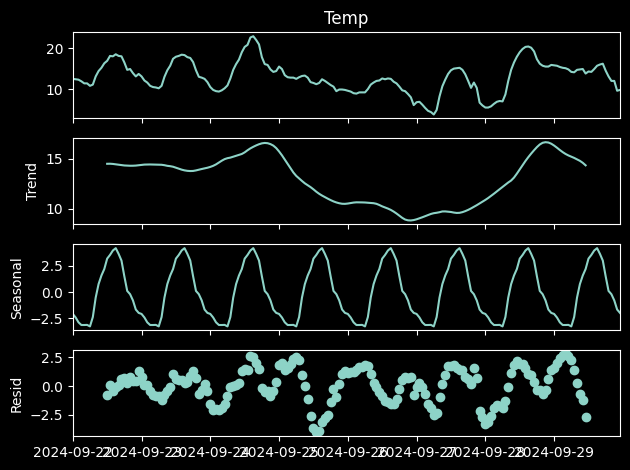

In [25]:
# Set the Date column as the index
wdf.set_index('Date', inplace=True)
# Perform seasonal decomposition
decomp = seasonal_decompose(wdf['Temp'], model='additive', period=24)
# Assuming hourly data with daily seasonality
# Plot the decomposed components
fig = decomp.plot(figsize=(12, 8))
fig.suptitle('Seasonal Decomposition of Melbourne Temperature', fontsize=14)
for ax in fig.axes:
    ax.set_facecolor('white')
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configure matplotlib for white backgrounds and better visualization
plt.style.use('default')  # Use default white background style
plt.rcParams['figure.facecolor'] = 'white'  # White figure background
plt.rcParams['axes.facecolor'] = 'white'    # White axes background
plt.rcParams['savefig.facecolor'] = 'white' # White background when saving

In [20]:
# Define the ARIMA model
arimamodel = ARIMA(wdf['Temp'], order=(1, 1, 1)) # Example order (p = past steps, d = I , q = moving average)
arimamodel_fit = arimamodel.fit()
# Summary of the model
print(arimamodel_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 2208
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1786.970
Date:                Tue, 23 Sep 2025   AIC                           3579.939
Time:                        16:52:07   BIC                           3597.037
Sample:                    06-01-2025   HQIC                          3586.186
                         - 08-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6412      0.026     24.301      0.000       0.590       0.693
ma.L1          0.0220      0.030      0.727      0.468      -0.037       0.082
sigma2         0.2956      0.006     50.042      0.0

/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [21]:
# Forecast
forecast_steps = 24
forecast = arimamodel_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=wdf.index[-1], periods=forecast_steps, freq='H')

/var/folders/nx/9nyxvzhs2yb6hpj4mycz43s40000gn/T/ipykernel_17465/2345013275.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=wdf.index[-1], periods=forecast_steps, freq='H')


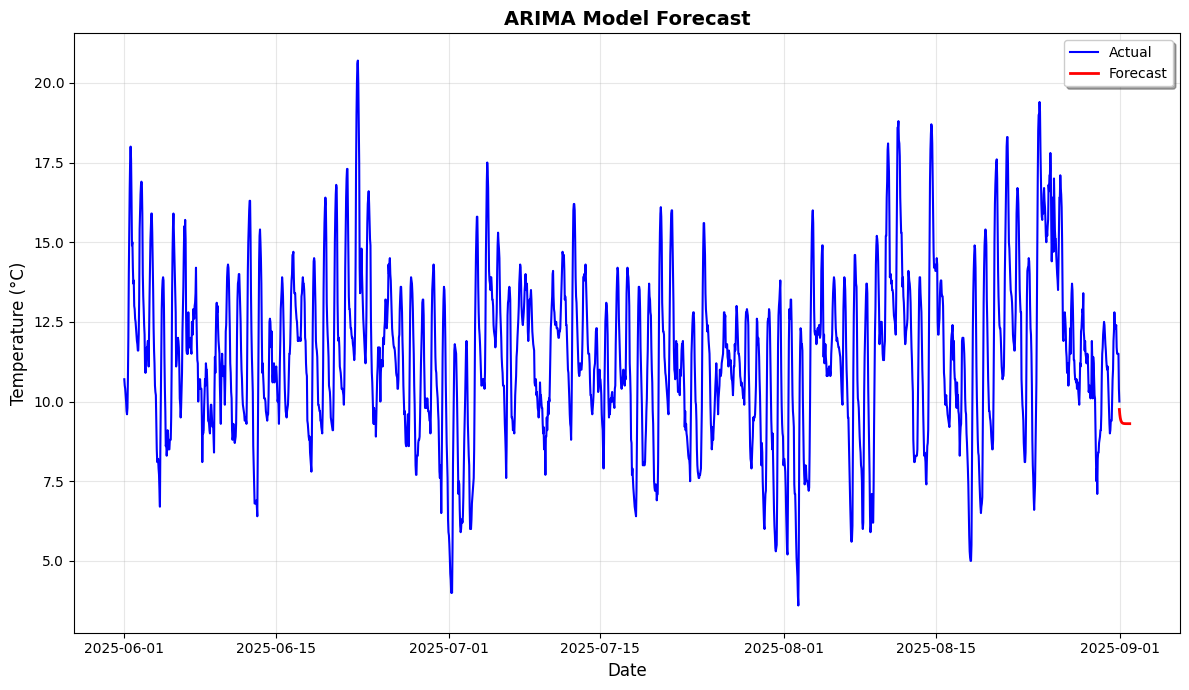

In [22]:

# Plot the forecast
plt.figure(figsize=(12, 7), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')
plt.plot(wdf['Temp'], label='Actual', linewidth=1.5, color='blue')
plt.plot(forecast_index, forecast, label='Forecast', color='red', linewidth=2)
plt.title('ARIMA Model Forecast', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [23]:

# Forecast
forecast_steps = 7 
forecast = arimamodel_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=wdf.index[-14], periods=forecast_steps + 1,
inclusive='right')

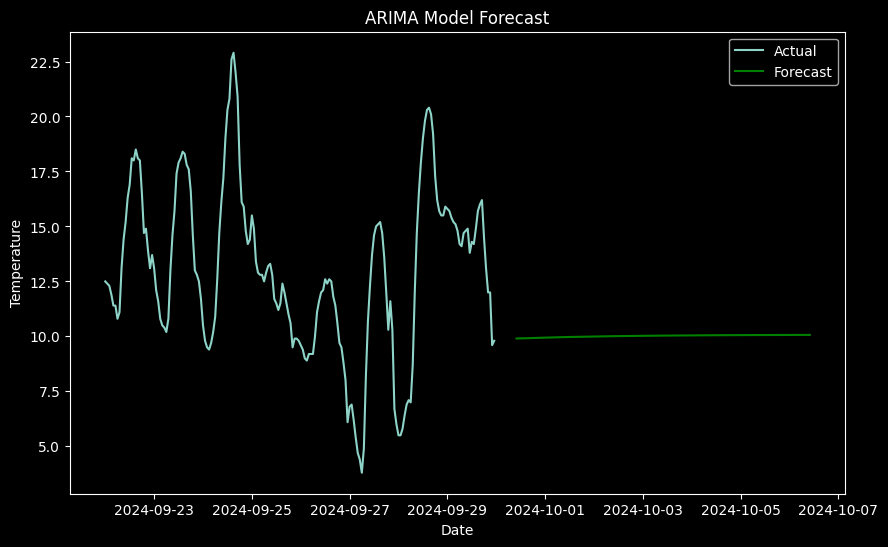

In [39]:

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(wdf['Temp'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='green')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [42]:
# Split data into training and test sets
train_size = int(len(wdf) * 0.8)
train, test = wdf['Temp'][:train_size], wdf['Temp'][train_size:]
# Fit the model on the training set
arimamodel = ARIMA(train, order=(1, 1, 1))
arimamodel_fit = arimamodel.fit()
# Make predictions on the test set
predictions = arimamodel_fit.forecast(steps=len(test))

/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/hmoses/Flinders ML/AI/wine_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [43]:
# Calculate metrics
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test, predictions)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

MAE: 1.7770447417024264
MSE: 6.159901641175407
RMSE: 2.4819149141691796
R^2: -0.019212235518546894


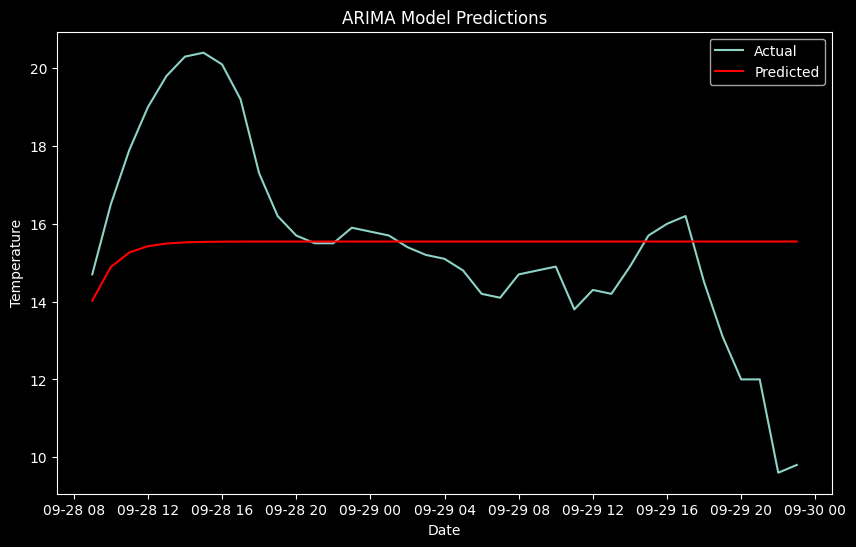

In [46]:
# Plot the predictions
plt.figure(figsize=(12, 7))
plt.plot(test.index, test, label='Actual', linewidth=2, color='blue')
plt.plot(test.index, predictions, label='Predicted', color='red', linewidth=2, alpha=0.8)
plt.title('ARIMA Model Predictions vs Actual', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(frameon=True, fancybox=True, shadow=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()